In [487]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
# mouse_drug_df
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
# clinical_trial_df

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")
# mouse_clinical_df

# Display the data table for preview

# mouse_clinical_df.columns

# mouse_clinical_df.describe()

mouse_clinical_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [488]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_by_drug_tp = mouse_clinical_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = (group_by_drug_tp["Tumor Volume (mm3)"]).mean().reset_index()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [489]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_err_drug_timepoint = mouse_clinical_df.groupby(["Drug", "Timepoint"])
stand_err_tumor = (stand_err_drug_timepoint["Tumor Volume (mm3)"]).sem().reset_index()

# Convert to DataFrame
stand_err_tumor_df = pd.DataFrame(stand_err_tumor)
                                
# Preview DataFrame
stand_err_tumor_df.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [490]:
# Minor Data Munging to Re-Format the Data Frames
reformat_stand_err_tumor = mean_tumor_volume_df.pivot_table(values="Tumor Volume (mm3)", index = "Timepoint", columns="Drug")

# Preview that Reformatting worked
reformat_stand_err_tumor.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


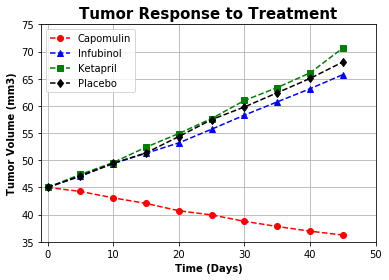

In [491]:
# Generate the Plot (with Error Bars)
# Activity 3 -- Line Configuration
# Editing Title and Labels - https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/fonts_demo_kw.html?highlight=bold%20font

x_axis = np.arange(0, 50, 5)
# x_axis

capo_st_err = plt.errorbar(x_axis, reformat_stand_err_tumor["Capomulin"], marker="o", ls="dashed", color ="red", label="Capomulin")
infu_st_err =  plt.errorbar(x_axis, reformat_stand_err_tumor["Infubinol"], marker="^", ls="dashed", color ="blue", label="Infubinol")
keta_st_err = plt.errorbar(x_axis, reformat_stand_err_tumor["Ketapril"], marker="s", ls="dashed", color ="green", label="Ketapril")
placebo_st_err = plt.errorbar(x_axis, reformat_stand_err_tumor["Placebo"], marker="d", ls="dashed",color ="black", label="Placebo")

plt.ylim(35, 75)
plt.xlim(-1, 50)

plt.title("Tumor Response to Treatment", weight='bold', fontsize=15)
plt.xlabel("Time (Days)", weight='bold', fontsize=10)
plt.ylabel("Tumor Volume (mm3)", weight='bold', fontsize=10)
plt.legend(loc="top left")
plt.grid()


# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")

In [492]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [493]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_by_drug_tp_2 = mouse_clinical_df.groupby(["Drug", "Timepoint"])
mean_met_site = (group_by_drug_tp_2["Metastatic Sites"]).mean()
# mean_met_site

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site)

# Preview DataFrame
mean_met_site_df.head(5)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [494]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stand_err_drug_timepoint_2 = mouse_clinical_df.groupby(["Drug", "Timepoint"])
stand_err_met_site = (stand_err_drug_timepoint_2["Metastatic Sites"]).sem()
# stand_err_met_site

# Convert to DataFrame
stand_err_met_site_df = pd.DataFrame(stand_err_met_site)

# Preview DataFrame
stand_err_met_site_df.head(5)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [495]:
# Minor Data Munging to Re-Format the Data Frames
reformat_stand_err_met = mean_met_site_df.pivot_table(values="Metastatic Sites", index = "Timepoint", columns="Drug")

# Preview that Reformatting worked
reformat_stand_err_met

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


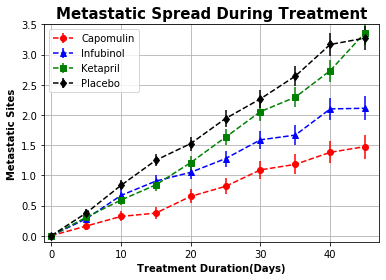

In [496]:
# Generate the Plot (with Error Bars)
x_axis_2 = np.arange(0, 50, 5)
# x_axis_2

# Adding the vertical dash on the marker 
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
yerr = np.linspace(0.05, 0.2, 10)
# Correct def. is Error Limit Selection -- yerr & xerr

capo_st_err_2 = plt.errorbar(x_axis_2, reformat_stand_err_met["Capomulin"], marker="o", ls="dashed", color ="red", label="Capomulin", yerr=yerr)
infu_st_err_2 =  plt.errorbar(x_axis_2, reformat_stand_err_met["Infubinol"], marker="^", ls="dashed", color ="blue", label="Infubinol", yerr=yerr)
keta_st_err_2 = plt.errorbar(x_axis_2, reformat_stand_err_met["Ketapril"], marker="s", ls="dashed", color ="green", label="Ketapril", yerr=yerr)
placebo_st_err_2 = plt.errorbar(x_axis_2, reformat_stand_err_met["Placebo"], marker="d", ls="dashed",color ="black", label="Placebo", yerr=yerr)

plt.ylim(-0.1, 3.5)
plt.xlim(-1, 47)

plt.title("Metastatic Spread During Treatment", weight='bold', fontsize=15)
plt.xlabel("Treatment Duration(Days)", weight='bold', fontsize=10)
plt.ylabel("Metastatic Sites", weight='bold', fontsize=10)
plt.legend(loc="top left")
plt.grid()

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [497]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) 
group_by_drug_tp_3 = mouse_clinical_df.groupby(["Drug", "Timepoint"])
count_mice_group = (group_by_drug_tp_3["Mouse ID"]).count().reset_index()
# count_mice_group

# Convert to DataFrame
count_mice_group_df = pd.DataFrame(count_mice_group)

# Preview DataFrame
count_mice_group_df.head(5)



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [498]:
# Minor Data Munging to Re-Format the Data Frames
reformat_count_mice = count_mice_group_df.pivot_table(values="Mouse ID", index = "Timepoint", columns="Drug")

# Preview the Data Frame
reformat_count_mice.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


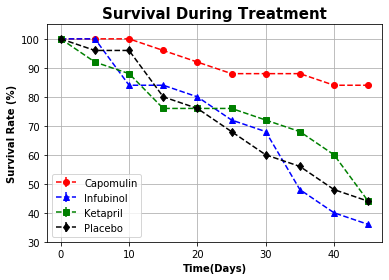

In [499]:
# Generate the Plot (Accounting for percentages)

# How to add or plug an equation to the plot?
# https://medium.com/future-vision/plotting-equations-in-python-d0edd9f088c8
# https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html (Bar Graph Annontations)


x_axis_3 = np.arange(0, 50, 5)
yerr_2 = np.linspace(0.05, 0.2, 10)

capo_st_err_3 = plt.errorbar(x_axis_3, reformat_count_mice["Capomulin"]/25*100, marker="o", ls="dashed", color ="red", label="Capomulin", yerr=yerr_2)
infu_st_err_3 =  plt.errorbar(x_axis_3, reformat_count_mice["Infubinol"]/25*100, marker="^", ls="dashed", color ="blue", label="Infubinol", yerr=yerr_2)
keta_st_err_3 = plt.errorbar(x_axis_3, reformat_count_mice["Ketapril"]/25*100, marker="s", ls="dashed", color ="green", label="Ketapril", yerr=yerr_2)
placebo_st_err_3 = plt.errorbar(x_axis_3, reformat_count_mice["Placebo"]/25*100, marker="d", ls="dashed",color ="black", label="Placebo", yerr=yerr_2)

plt.ylim(30, 105)
plt.xlim(-2, 47)

plt.title("Survival During Treatment", weight='bold', fontsize=15)
plt.xlabel("Time(Days)", weight='bold', fontsize=10)
plt.ylabel("Survival Rate (%)", weight='bold', fontsize=10)
plt.legend(loc="bottom left")
plt.grid()

# Save the Figure
plt.savefig("Survival_During_Treatment.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [500]:
# Calculate the percent changes for each drug
# https://www.investopedia.com/terms/p/percentage-change.asp

capomulin_percent_change = ((reformat_stand_err_tumor["Capomulin"][45] - reformat_stand_err_tumor["Capomulin"][0])/reformat_stand_err_tumor["Capomulin"][0])*100
# capomulin_percent_change

ceftamin_percent_change = ((reformat_stand_err_tumor["Ceftamin"][45] - reformat_stand_err_tumor["Ceftamin"][0])/reformat_stand_err_tumor["Ceftamin"][0])*100
infubinol_percent_change = ((reformat_stand_err_tumor["Infubinol"][45] - reformat_stand_err_tumor["Infubinol"][0])/reformat_stand_err_tumor["Infubinol"][0])*100
ketapril_percent_change = ((reformat_stand_err_tumor["Ketapril"][45] - reformat_stand_err_tumor["Ketapril"][0])/reformat_stand_err_tumor["Ketapril"][0])*100
naftisol_percent_change = ((reformat_stand_err_tumor["Naftisol"][45] - reformat_stand_err_tumor["Naftisol"][0])/reformat_stand_err_tumor["Naftisol"][0])*100
placebo_percent_change = ((reformat_stand_err_tumor["Placebo"][45] - reformat_stand_err_tumor["Placebo"][0])/reformat_stand_err_tumor["Placebo"][0])*100
propriva_percent_change = ((reformat_stand_err_tumor["Propriva"][45] - reformat_stand_err_tumor["Propriva"][0])/reformat_stand_err_tumor["Propriva"][0])*100
ramicane_percent_change = ((reformat_stand_err_tumor["Ramicane"][45] - reformat_stand_err_tumor["Ramicane"][0])/reformat_stand_err_tumor["Ramicane"][0])*100
stelasyn_percent_change = ((reformat_stand_err_tumor["Stelasyn"][45] - reformat_stand_err_tumor["Stelasyn"][0])/reformat_stand_err_tumor["Stelasyn"][0])*100
zoniferol_percent_change = ((reformat_stand_err_tumor["Zoniferol"][45] - reformat_stand_err_tumor["Zoniferol"][0])/reformat_stand_err_tumor["Zoniferol"][0])*100

# Display the data to confirm
print(f"Drug Percent Change (%)")
print(f"-------------------------------")
print(f"Capomulin {capomulin_percent_change.round(6)}")
print(f"Ceftamin   {ceftamin_percent_change.round(6)}")
print(f"Infubinol  {infubinol_percent_change.round(6)}")
print(f"Ketapril   {ketapril_percent_change.round(6)}")
print(f"Naftisol   {naftisol_percent_change.round(6)}")
print(f"Placebo    {placebo_percent_change.round(6)}")
print(f"Propriva   {propriva_percent_change.round(6)}")
print(f"Ramicane  {ramicane_percent_change.round(6)}")
print(f"Stelasyn   {stelasyn_percent_change.round(6)}")
print(f"Zoniferol  {zoniferol_percent_change.round(6)}")

# rounding? (.round())
# missing the dtype: float64, I can try making a variable for all the percent changes?
# it'll make manipulating it easier, than using many variables

# total_percent_change_df = pd.DataFrame({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
#                                         "": [capomulin_percent_change, ceftamin_percent_change, infubinol_percent_change, ketapril_percent_change, naftisol_percent_change, placebo_percent_change, propriva_percent_change, ramicane_percent_change, stelasyn_percent_change, zoniferol_percent_change]
#                                        })
# print(total_percent_change_df)
# total_percent_change_df.dtypes



Drug Percent Change (%)
-------------------------------
Capomulin -19.475303
Ceftamin   42.516492
Infubinol  46.123472
Ketapril   57.028795
Naftisol   53.923347
Placebo    51.29796
Propriva   47.241175
Ramicane  -22.3209
Stelasyn   52.085134
Zoniferol  46.579751


In [501]:
# Store all Relevant Percent Changes into a Tuple
# Needed for the last graph, Capomulin, Infubinol, Ketapril, Placebo

# relevant_percent_changes = ({'Capomulin': capomulin_percent_change, 'Infubinol': infubinol_percent_change, 
#                                          'Ketapril': ketapril_percent_change, 'Placebo': placebo_percent_change})
# relevant_percent_changes

# ------------------------------------------

# relevant_percent_changes_df = pd.DataFrame({"Drug": [capomulin_percent_change, infubinol_percent_change, ketapril_percent_change,  placebo_percent_change]})

# relevant_percent_changes_df

# ------------------------------------------

relevant_percent_changes_df = pd.DataFrame({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
                                        "": [capomulin_percent_change, ceftamin_percent_change, infubinol_percent_change, ketapril_percent_change, naftisol_percent_change, placebo_percent_change, propriva_percent_change, ramicane_percent_change, stelasyn_percent_change, zoniferol_percent_change]
                                       })

relevant_percent_changes_df

,Drug,
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


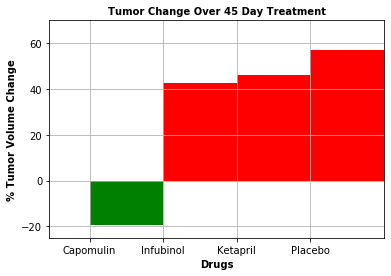

In [502]:
# Splice the data between passing and failing drugs
capo_bar = plt.bar("Capomulin", relevant_percent_changes_df[""][0], color='g', alpha=1, width=1, align="edge")
infu_bar = plt.bar("Infubinol", relevant_percent_changes_df[""][1], color='r', alpha=1, width=1, align="edge")
keta_bar = plt.bar("Ketapril", relevant_percent_changes_df[""][2], color='r', alpha=1, width=1, align="edge")
placebo_bar = plt.bar("Placebo", relevant_percent_changes_df[""][3], color='r', alpha=1, width=1, align="edge")

# Orient widths. Add labels, tick marks, etc. 
plt.xlim(-.55, 4)
plt.ylim(-25, 70)

plt.title("Tumor Change Over 45 Day Treatment", weight="bold", fontsize=10)
plt.ylabel("% Tumor Volume Change", weight="bold", fontsize=10)
plt.xlabel("Drugs", weight="bold", fontsize=10)
plt.grid()

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("Summary_Bar_Graph.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)